<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [2]:
path = './data_amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


# Use spacy to clean stop words

In [4]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [5]:
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

In [6]:
df['token'] = df['reviews.text'].apply(get_lemmas)

# Gensim LDA Topic Modeling

In [7]:
# A dictionary representation of all the words in the corpus
id2word = corpora.Dictionary(df['token'])

In [8]:
# Remove extreme values from the dataset
# no_below - Words mentioned less than 10 times get rid of it
# no_above - if the words mention 75% of the time remove it
id2word.filter_extremes(no_below=10, no_above=0.75)

In [9]:
# A bag of words(bow) representation of the corpus
corpus = [id2word.doc2bow(text) for text in df['token']]

In [10]:
# Instantiate the lda model
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=4
                  )

In [11]:
# Topics found
lda.print_topics()

[(0,
  '0.152*"love" + 0.052*"buy" + 0.045*"gift" + 0.036*"use" + 0.026*"son" + 0.022*"easy" + 0.021*"money" + 0.020*"family" + 0.019*"wife" + 0.018*"Christmas"'),
 (1,
  '0.021*"come" + 0.021*"slow" + 0.017*"take" + 0.016*"box" + 0.016*"open" + 0.013*"like" + 0.012*"thing" + 0.012*"home" + 0.011*"work" + 0.011*"find"'),
 (2,
  '0.090*"kid" + 0.057*"tablet" + 0.032*"time" + 0.024*"control" + 0.023*"good" + 0.022*"great" + 0.021*"app" + 0.020*"parental" + 0.019*"free" + 0.018*"love"'),
 (3,
  '0.093*"love" + 0.057*"great" + 0.055*"app" + 0.050*"kid" + 0.045*"easy" + 0.039*"use" + 0.030*"tablet" + 0.025*"game" + 0.022*"learn" + 0.019*"age"'),
 (4,
  '0.109*"tablet" + 0.047*"old" + 0.039*"year" + 0.036*"game" + 0.035*"love" + 0.025*"great" + 0.022*"use" + 0.021*"play" + 0.019*"watch" + 0.017*"buy"'),
 (5,
  '0.054*"year" + 0.050*"old" + 0.048*"buy" + 0.036*"love" + 0.033*"charge" + 0.031*"grandson" + 0.021*"2" + 0.019*"5" + 0.018*"3" + 0.018*"drop"'),
 (6,
  '0.090*"kindle" + 0.032*"user"

# Interpret Results

In [12]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [13]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.211377  0.086450       1        1  19.272093
10    -0.041775 -0.072124       2        1   8.815297
4      0.138503 -0.071028       3        1   7.767680
13    -0.314021 -0.172253       4        1   7.434919
14     0.083383  0.139716       5        1   6.893419
9      0.040599  0.037580       6        1   6.375788
2      0.068475 -0.130928       7        1   6.297553
5      0.108255  0.054441       8        1   5.835689
7     -0.206888 -0.052967       9        1   5.604191
1     -0.075911  0.166048      10        1   4.929934
3      0.127088 -0.221433      11        1   4.520201
12    -0.080938  0.199839      12        1   4.338876
8      0.147637  0.059973      13        1   4.229786
0      0.140400 -0.003186      14        1   3.892761
6      0.076569 -0.020130      15        1   3.791811, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
3     Default  9253.000000    battery  9253.000000  30.0000  30.0000
18    Default  9101.000000      great  9101.000000  29.0000  29.0000
15    Default  5116.000000      price  5116.000000  28.0000  28.0000
79    Default  6247.000000       love  6247.000000  27.0000  27.0000
1589  Default  7184.000000     tablet  7184.000000  26.0000  26.0000
11    Default  2495.000000    product  2495.000000  25.0000  25.0000
29    Default  6667.000000       good  6667.000000  24.0000  24.0000
161   Default  2905.000000        kid  2905.000000  23.0000  23.0000
8     Default  4390.000000       work  4390.000000  22.0000  22.0000
1429  Default  1428.000000     kindle  1428.000000  21.0000  21.0000
439   Default  2504.000000        old  2504.000000  20.0000  20.0000
28    Default  3376.000000       easy  3376.000000  19.0000  19.0000
91    Default  2278.000000       year  2278.000000  18.0000  18.0000
26    Default  5652.000000        buy  5652.000000  17.0000  17.0000
1118  Default  2374.000000        app  2374.000000  16.0000  16.0000
959   Default  1873.000000       book  1873.000000  15.0000  15.0000
117   Default  1206.000000       gift  1206.000000  14.0000  14.0000
16    Default  2089.000000      brand  2089.000000  13.0000  13.0000
637   Default  2091.000000       read  2091.000000  12.0000  12.0000
1718  Default  1753.000000     Kindle  1753.000000  11.0000  11.0000
83    Default  4876.000000        use  4876.000000  10.0000  10.0000
153   Default  1908.000000       game  1908.000000   9.0000   9.0000
1192  Default  1698.000000     screen  1698.000000   8.0000   8.0000
34    Default  2554.000000   purchase  2554.000000   7.0000   7.0000
338   Default   960.000000      value   960.000000   6.0000   6.0000
24    Default   848.000000  Christmas   848.000000   5.0000   5.0000
192   Default   940.000000     charge   940.000000   4.0000   4.0000
20    Default  2589.000000       long  2589.000000   3.0000   3.0000
800   Default  1033.000000   daughter  1033.000000   2.0000   2.0000
113   Default  1076.000000       size  1076.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
1477  Topic15    66.695938     choose   154.579407   2.4318  -5.1720
356   Topic15    33.412022        pop    58.196472   2.7174  -5.8632
495   Topic15    32.456272   transfer    56.182854   2.7236  -5.8922
642   Topic15   226.324936       fire  1089.345093   1.7010  -3.9501
1260  Topic15    88.271912    content   262.184052   2.1837  -4.8917
298   Topic15    98.932564     option   329.994507   2.0677  -4.7777
349   Topic15   177.626740      child   960.747925   1.5843  -4.1924
95    Topic15   128.684509       able   585.430054   1.7573  -4.5147
84    Topic15   200.915070       want  1264.626953   1.4327  -4.0692
959   Topic15   239.815811       book  1873.544189   1.2166  -3.8922
694   Topic15    54.123260    ability   166.254318   2.1501  -5.3808
619

# Most optimal number of topic using Coherence

In [14]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = path
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [15]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=df['token'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

# Plot

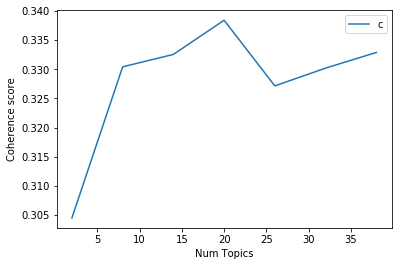

In [17]:
# Show graph
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling